# Fisher information applied to FPM
According to the Cramer-Rao inequality, the covariance matrix of an estimator is bounded by the inverse of the Fisher Information Matrix (FIM)

$C(\theta) \leq \bf{I}^{-1} (\theta)$



## FIM of a Poisson
$f(x|\lambda) = \frac{\lambda^{x} e^{-\lambda}}{x!}$

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from fpmsample.simicro import SimMicroscope, NoiseModel
from fpmsample import data, shapes
from phasemath.math import SimImage
lam = 1
n=10
x = np.random.poisson(lam=lam, size=n)
# it = n*ix
ix = 1/lam
it = n/lam

So the CRLB for the estimators of $\lambda$ is $CRB(\lambda) = \mathcal{I}^{-1}(\lambda)=\lambda/n$

## Applied to simulated FPM images
First construct a simulated image to use in the acquisition.

1.0


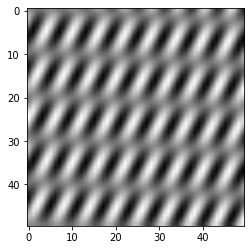

In [2]:
size = 50
simulated_image = SimImage(size=size, max_elements=2)
simimage = simulated_image.array
plt.imshow(np.real(simimage), cmap='gray', interpolation='bilinear')
print(np.imag(simimage).max())

settitn
settitn


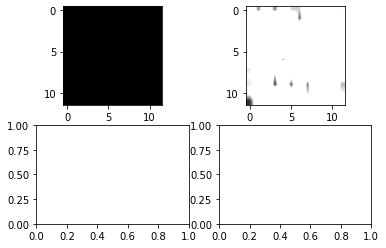

In [3]:
noise_model = NoiseModel(sigmam=[.0, .0])
cfg = data.cfg_load()
sm = SimMicroscope(noise_model=noise_model, cfg=cfg, simulated_image=simimage)
sm.generate_samples()
rm = SimMicroscope.from_dirname(dirname=sm.dirname)
delta_gk, centers = rm.get_phaseopt_input()
fig, axes = plt.subplots(2, 2)
axes[0][0].imshow(np.real(delta_gk[0]), cmap='gray', interpolation='bilinear', vmin=0, vmax=int(1E5)**2)
axes[0][1].imshow(np.real(delta_gk[10]), cmap='gray', interpolation='bilinear', vmin=0, vmax=1e5)

In [4]:
print(np.abs(delta_gk[0]).max())

526718.9811055992


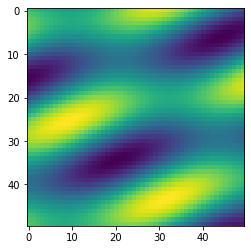

In [5]:
n=50
e = 2
t=np.linspace(0,n,n)
yy, xx = np.mgrid[:n, :n]
def random_parameters():
    amps, phases, freqs = np.random.random((3, e))
    freqs = freqs.reshape(-1,1, 1)*np.pi/4
    phases = phases.reshape(-1,1, 1)*2*np.pi
    amps = amps.reshape(-1, 1, 1)
    amps = amps*np.tile(np.ones((n, n)), (e, 1, 1))
    freqs = freqs*np.tile(np.ones((n, n)), (e, 1, 1))
    return amps, freqs, phases
xxtiled = np.tile(xx, (e, 1, 1) )
yytiled = np.tile(yy, (e, 1, 1) )
axx, fxx, pxx = random_parameters()
ayy, fyy, pyy = random_parameters()
fcns = axx*np.cos(xxtiled*fxx+pxx+yytiled*fyy+pyy)
out_fcn = np.sum(fcns, axis=0)
plt.imshow(out_fcn)
plt.show()
# amps = amps*np.ones((e, n, n))
# amps = np.tile(amps, (e, 50, 50))
# print(amps[0])
# amps*np.tile(np.ones((n, n)), (e, 1, 1))

## Combined Poisson and Gaussian distribution
The combination of these distributions, if independent, is the convolution of their pdfs. Assuming a poisson process 
\begin{equation}
p_l(x) = \frac{e^{-\lambda} x^l}{l!},
\end{equation}
and a gaussian distribution of the like
\begin{equation}
p_g(x) = \frac{1}{\sqrt{2\pi}\sigma_k} e^{\frac{-(x-\eta_k)^2}{2\sigma_k^2}  }
\end{equation}
la distribución de la suma $Z=L+G$ vendrá dada por
\begin{equation}
p_Z(z) = \sum p_G(z) p_L(z-g),
\end{equation}
con lo cual
\begin{equation}
pz(z) = \frac{e^{-\lambda}}{\sqrt{2 \pi} \sigma_k} \sum_{l=0}{\infty} \frac{\lambda^l}{l!} e^{\frac{-(z-l-\eta_k)^2}{2\sigma_k} }
\end{equation}

/home/juan/miniconda3/envs/fastfpm-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


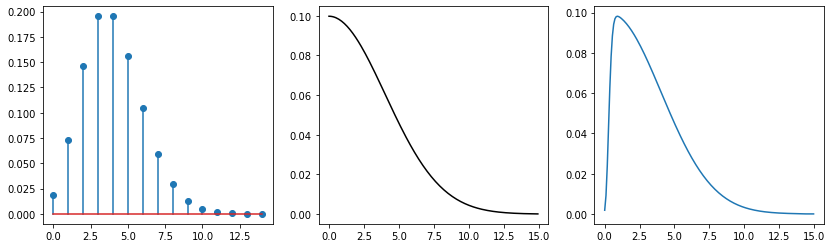

In [56]:
from scipy.stats import poisson, norm

x1 = np.arange(0,15)
lam = 4
pois = poisson.pmf(x1, lam)
x2 = np.arange(0, 15, .1)
gauss = norm.pdf(x2, 0, 4)
conv = np.convolve(pois, gauss)
fig, axes = plt.subplots(1,3, figsize=(14, 4))
axes[0].stem(pois)
axes[1].plot(x2, gauss, 'k')
axes[2].plot(np.linspace(0, 15, len(conv)), conv)
plt.show()